# Recommendation System

# 1. Data Loading

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2.1 Jumlah Data

In [44]:
import pandas as pd

places = pd.read_csv('/content/drive/MyDrive/Casptone Project - Tourify /Machine Learning/Rekomendasi/ds_final (1).csv')
ratings = pd.read_csv('/content/drive/MyDrive/Casptone Project - Tourify /Machine Learning/Rekomendasi/DatasetTourify - Sheet4_id.csv')

print('Jumlah places: ', len(places.id.unique()))
print('Jumlah ratings: ', len(ratings.rating))


Jumlah places:  85
Jumlah ratings:  85


### 2.2 Mengecek data places


In [45]:
places.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           85 non-null     int64 
 1   name         85 non-null     object
 2   type         85 non-null     object
 3   village      85 non-null     object
 4   subdistrict  85 non-null     object
 5   regency      85 non-null     object
 6   country      85 non-null     object
 7   type_label   85 non-null     int64 
 8   new_rating   85 non-null     int64 
 9   User_id      85 non-null     int64 
dtypes: int64(4), object(6)
memory usage: 6.8+ KB


In [46]:
places.head()


,id,name,type,village,subdistrict,regency,country,type_label,new_rating,User_id
0,1,Monumen Nasional,Museum,Gambir,Gambir,Kota Administrasi Jakarta Pusat,Indonesia,1,95,145
1,2,Museum Fatahillah,Museum,Pinangsia,Gambir,Kota Administrasi Jakarta Pusat,Indonesia,1,56,103
2,3,Museum Jenderal Ahmad Yani,Museum,Menteng,Menteng,Kota Administrasi Jakarta Pusat,Indonesia,1,71,19
3,4,Museum Sudirman,Museum,Potrobangsan,Magelang Utara,Kota Magelang,Indonesia,1,66,205
4,5,Museum Angkut,Museum,Ngaglik,Batu,Kabupaten Malang,Indonesia,1,70,116


In [47]:
places.describe()


,id,type_label,new_rating,User_id
count,85.000000,85.000000,85.000000,85.000000
mean,43.858824,3.776471,77.305882,133.317647
std,25.292646,2.326741,15.064957,84.430052
min,1.000000,1.000000,50.000000,1.000000
25%,22.000000,2.000000,64.000000,71.000000
50%,44.000000,3.000000,78.000000,121.000000
75%,65.000000,5.000000,92.000000,194.000000
max,87.000000,8.000000,100.000000,297.000000


### 2.3 Mengecek data ratings


In [48]:
ratings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   User_id  85 non-null     int64
 1   id       85 non-null     int64
 2   rating   85 non-null     int64
dtypes: int64(3)
memory usage: 2.1 KB


Menampilkan sample dataset ratings.

In [49]:
ratings.head()


,User_id,id,rating
0,145,1,95
1,103,2,56
2,19,3,71
3,205,4,66
4,116,5,70


Melakukan pengecekan deskripsi statistik dataset ratings dengan fitur describe().

In [50]:
ratings.describe()


,User_id,id,rating
count,85.000000,85.000000,85.000000
mean,131.470588,43.858824,75.858824
std,85.037889,25.292646,18.693106
min,1.000000,1.000000,3.000000
25%,67.000000,22.000000,63.000000
50%,117.000000,44.000000,78.000000
75%,194.000000,65.000000,92.000000
max,297.000000,87.000000,100.000000


## 3.1. Menghapus Kolom yang Tidak Diperlukan

Data yang diperlukan hanya ada pada kolom `id`, `name`, dan `type`, jadi hapus yang lain.

In [51]:
print(places.columns)

Index(['id', 'name', 'type', 'village', 'subdistrict', 'regency', 'country',
       'type_label', 'new_rating', 'User_id'],
      dtype='object')


In [52]:
places = places.drop([ 'village', 'subdistrict', 'regency', 'country',
       'type_label', 'new_rating', 'User_id'], axis=1)

## 3.2. Pengecekan Missing Value

In [53]:
places.isnull().sum()


id      0
name    0
type    0
dtype: int64

In [54]:
ratings.isnull().sum()


User_id    0
id         0
rating     0
dtype: int64

## 3.3. Pengecekan Data Duplikat

In [55]:
print(f'Jumlah data places yang duplikat: {places.duplicated().sum()}')
print(f'Jumlah data rating yang duplikat: {ratings.duplicated().sum()}')


Jumlah data places yang duplikat: 0
Jumlah data rating yang duplikat: 0


Menghapus duplicate

In [56]:
ratings.drop_duplicates(inplace = True)

### 4.1. TF-IDF Vectorizer

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()

tf.fit(places['type'])

tf.get_feature_names_out()


array(['beach', 'historical', 'lake', 'landmark', 'museum', 'natural',
       'wahana', 'waterfall'], dtype=object)

Transformasi data tempat pada kolom category menjadi bentuk verktor matriks.

In [58]:
tfidf_matrix = tf.fit_transform(places['type'])
tfidf_matrix.shape


(85, 8)

Mengubah bentuk vectorizer yaitu vektor menjadi bentuk matriks.

In [59]:
tfidf_matrix.todense()


matrix([[0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0

In [60]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=places.name
).sample(10, axis=0)


,beach,historical,lake,landmark,museum,natural,wahana,waterfall
name,,,,,,,,
Museum Pendaratan Pesawat Ampibi,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Museum Sudirman,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Pulau Randayan,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Pulau Lemukutan,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Danau Framu Ayamuru,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Museum Kereta Api Ambarawa,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Museum Wayang Jakarta,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Lokawisata Baturraden,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Museum Fatahillah,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### 4.2. Cosine Similarity

Melakukan perhitungan derajat kesamaan atau similatiry degree antar nama tempat wisata dengan teknik cosine similarity menggunakan library scikit-learn.

In [61]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim


array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

Mengubah matriks cosine similarity menjadi bentuk dataframe antar nama tempat (destinasi wisata).

In [62]:
cosine_sim_df = pd.DataFrame(
    cosine_sim, index=places.name, columns=places.name)
print('Shape:', cosine_sim_df.shape)

cosine_sim_df.sample(10, axis=0)


Shape: (85, 85)


name,Monumen Nasional,Museum Fatahillah,Museum Jenderal Ahmad Yani,Museum Sudirman,Museum Angkut,Museum Pendaratan Pesawat Ampibi,Museum Mandar Majene,Museum Perjuangan Rakyat,Museum Sulawesi Tengah,Museum Balla Lompoa,...,Danau Ranu Agung,Danau Labuan Cermin,Danau Ubur-ubur,Danau Sentarum,Danau Limboto,Danau Biru Kolaka Utara,Danau Poso,Danau Hijau Balocci,Danau Rana,Danau Framu Ayamuru
name,,,,,,,,,,,,,,,,,,,,,
Danau Sentarum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Candi Prambanan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Museum Mandar Majene,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Candi Borobudur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pantai Netsapa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pantai Pulang Sawal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Air Terjun Tumpak Sewu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Air Terjun Limbong Kamandang,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gunung Bromo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 4.3. Recommendation Testing

Melakukan pendefinisian fungsi place_recommendations untuk menampilkan hasil rekomendasi tempat berdasarkan kesamaan kategori dari sebuah tempat.

In [63]:
def place_recommendations(place_name, similarity_data=cosine_sim_df, items=places[['name', 'type']], k=5):
    index = similarity_data.loc[:,place_name].to_numpy().argpartition(range(-1, -k, -1))
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(place_name, errors='ignore')
    return pd.DataFrame(closest).merge(items).head(k)

In [64]:
place_name = 'Istana Malige'
places[places.name.eq(place_name)]


,id,name,type
39,41,Istana Malige,Historical


In [65]:
place_recommendations(place_name)

,name,type
0,Patung Martha Christina Tiahahu,Historical
1,Candi Prambanan,Historical
2,Candi Borobudur,Historical
3,Rumah Adat Dulohupa,Historical
4,Bori' Kalimbuang,Historical


### 5.1. Data Preparation

In [66]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt


Proses encoding fitur User_Id pada dataset ratings menjadi array.

In [67]:
user_ids = ratings['User_id'].unique().tolist()
print('list User_Id: ', user_ids)

user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded User_Id : ', user_to_user_encoded)

user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke User_Id: ', user_encoded_to_user)


list User_Id:  [145, 103, 19, 205, 116, 255, 4, 207, 55, 146, 177, 9, 71, 86, 277, 18, 95, 120, 242, 162, 88, 285, 196, 97, 57, 121, 156, 44, 73, 13, 266, 28, 170, 297, 38, 32, 138, 25, 67, 66, 64, 194, 40, 220, 213, 31, 27, 75, 117, 49, 178, 91, 283, 224, 82, 144, 258, 143, 210, 292, 83, 129, 193, 291, 104, 1, 186, 157, 113, 281, 100, 77]
encoded User_Id :  {145: 0, 103: 1, 19: 2, 205: 3, 116: 4, 255: 5, 4: 6, 207: 7, 55: 8, 146: 9, 177: 10, 9: 11, 71: 12, 86: 13, 277: 14, 18: 15, 95: 16, 120: 17, 242: 18, 162: 19, 88: 20, 285: 21, 196: 22, 97: 23, 57: 24, 121: 25, 156: 26, 44: 27, 73: 28, 13: 29, 266: 30, 28: 31, 170: 32, 297: 33, 38: 34, 32: 35, 138: 36, 25: 37, 67: 38, 66: 39, 64: 40, 194: 41, 40: 42, 220: 43, 213: 44, 31: 45, 27: 46, 75: 47, 117: 48, 49: 49, 178: 50, 91: 51, 283: 52, 224: 53, 82: 54, 144: 55, 258: 56, 143: 57, 210: 58, 292: 59, 83: 60, 129: 61, 193: 62, 291: 63, 104: 64, 1: 65, 186: 66, 157: 67, 113: 68, 281: 69, 100: 70, 77: 71}
encoded angka ke User_Id:  {0: 145

Proses encoding fitur Place_Id pada dataset ratings menjadi array.

In [68]:
place_ids = ratings['id'].unique().tolist()
place_to_place_encoded = {x: i for i, x in enumerate(place_ids)}
place_encoded_to_place = {i: x for i, x in enumerate(place_ids)}

Melakukan mapping atau pemetaan kolom user dan place ke dataset ratings yang berkaitan.

In [69]:
ratings['user'] = ratings['User_id'].map(user_to_user_encoded)
ratings['place'] = ratings['id'].map(place_to_place_encoded)


Melakukan pengecekan jumlah user, jumlah tempat, penilaian minimal, dan penilaian maksimal.

In [70]:
users_count = len(user_to_user_encoded)
place_count = len(place_encoded_to_place)

ratings['rating'] = ratings['rating'].values.astype(np.float32)

min_rating = min(ratings['rating'])
max_rating = max(ratings['rating'])

print(f'Users Count: {users_count}')
print(f'Places Count: {place_count}')
print(f'Min rating: {min_rating}')
print(f'Max rating: {max_rating}')


Users Count: 72
Places Count: 85
Min rating: 3.0
Max rating: 100.0


### 5.2. Split Data Latih dan Data Validasi

Mengacak dataset ratings.

In [71]:
ratings = ratings.sample(frac=1, random_state=42)
ratings


,User_id,id,rating,user,place
78,186,81,68.0,66,78
0,145,1,95.0,0,0
68,83,70,94.0,60,68
22,145,23,97.0,0,22
12,9,13,100.0,11,12
...,...,...,...,...,...
20,162,21,80.0,19,20
60,82,62,53.0,54,60
71,97,74,57.0,23,71
14,86,15,86.0,13,14


Membagi dataset menjadi data latih (train) dan data uji (test), yaitu sebesar 20% data uji dan 80% data latih.

In [72]:
x = ratings[['user', 'place']].values
y = ratings['rating'].apply(lambda x: (
    x - min_rating) / (max_rating - min_rating)).values

train_indices = int(0.8 * ratings.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)


[[66 78]
 [ 0  0]
 [60 68]
 [ 0 22]
 [11 12]
 [70 82]
 [10 10]
 [17 18]
 [ 4  4]
 [58 66]
 [38 40]
 [14 47]
 [33 35]
 [62 72]
 [50 55]
 [49 54]
 [31 33]
 [65 77]
 [40 42]
 [44 49]
 [ 8 11]
 [28 30]
 [37 39]
 [26 28]
 [ 9  9]
 [38 64]
 [ 5  5]
 [20 45]
 [29 31]
 [32 34]
 [42 44]
 [67 84]
 [15 16]
 [57 65]
 [ 7  7]
 [61 69]
 [51 56]
 [18 19]
 [29 70]
 [23 25]
 [48 53]
 [12 13]
 [55 61]
 [ 3  3]
 [16 17]
 [36 38]
 [ 8  8]
 [59 67]
 [ 6  6]
 [34 36]
 [36 76]
 [56 62]
 [45 50]
 [36 46]
 [71 83]
 [14 15]
 [25 27]
 [39 41]
 [12 58]
 [24 26]
 [43 48]
 [22 24]
 [41 43]
 [69 81]
 [64 75]
 [52 57]
 [30 32]
 [68 80]
 [53 59]
 [44 63]
 [33 73]
 [35 37]
 [27 29]
 [ 1  1]
 [47 52]
 [20 21]
 [ 2  2]
 [21 23]
 [67 79]
 [63 74]
 [19 20]
 [54 60]
 [23 71]
 [13 14]
 [46 51]] [0.67010309 0.94845361 0.93814433 0.96907216 1.         0.98969072
 0.97938144 0.91752577 0.69072165 0.78350515 0.93814433 0.96907216
 0.79381443 0.83505155 0.6185567  0.93814433 0.83505155 0.77319588
 0.         0.56701031 0.59793814

### 5.3. Model Development

In [73]:
class RecommenderNet(tf.keras.Model):
  def __init__(self, users_count, place_count, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.users_count = users_count
    self.place_count = place_count
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        users_count,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-8)
    )
    self.user_bias = layers.Embedding(users_count, 1)
    self.place_embedding = layers.Embedding(
        place_count,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-8)
    )
    self.place_bias = layers.Embedding(place_count, 1)

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0])
    user_bias = self.user_bias(inputs[:, 0])
    place_vector = self.place_embedding(inputs[:, 1])
    place_bias = self.place_bias(inputs[:, 1])

    dot_user_place = tf.tensordot(user_vector, place_vector, 2)

    x = dot_user_place + user_bias + place_bias

    return tf.nn.sigmoid(x)

Proses kompilasi atau compile dengan:
- binary crossentropy loss function: loss function untuk menghitung loss pada model klasifikasi biner.
- adam optimizer: algoritma optimisasi yang digunakan untuk mengupdate bobot pada model machine learning secara efisien.
- metrik RMSE (Root Mean Square Error): metrik yang digunakan untuk mengukur seberapa jauh hasil prediksi dari model dari nilai aktual. RMSE dihitung dengan mencari rata-rata dari kuadrat error yang diakumulasikan dari seluruh data.

In [74]:
model = RecommenderNet(users_count, place_count, 50)

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)


Menambahkan callback EarlyStopping yang akan menghentikan training jika tidak ada peningkatan selama 5 epochs.

In [75]:
from keras.callbacks import  EarlyStopping

callbacks = EarlyStopping(
    min_delta=0.0000001,
    patience=50,
    restore_best_weights=True,
)


Melatih model.

In [76]:
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=8,
    epochs=100,
    validation_data=(x_val, y_val),
    callbacks=[callbacks]
)

Epoch 1/100
9/9 [==============================] - 1s 22ms/step - loss: 0.6989 - root_mean_squared_error: 0.3314 - val_loss: 0.9104 - val_root_mean_squared_error: 0.4145
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 0.6935 - root_mean_squared_error: 0.3270 - val_loss: 0.9105 - val_root_mean_squared_error: 0.4145
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 0.7024 - root_mean_squared_error: 0.3276 - val_loss: 0.9105 - val_root_mean_squared_error: 0.4145
Epoch 4/100
9/9 [==============================] - 0s 7ms/step - loss: 0.7525 - root_mean_squared_error: 0.3629 - val_loss: 0.9106 - val_root_mean_squared_error: 0.4146
Epoch 5/100
9/9 [==============================] - 0s 6ms/step - loss: 0.6601 - root_mean_squared_error: 0.3012 - val_loss: 0.9106 - val_root_mean_squared_error: 0.4146
Epoch 6/100
9/9 [==============================] - 0s 7ms/step - loss: 0.6992 - root_mean_squared_error: 0.3305 - val_loss: 0.9105 - val_root_mean_squared

Visualisasi grafik data training dan testing untuk masing-masing metrik Root Mean Square Error dan loss function.

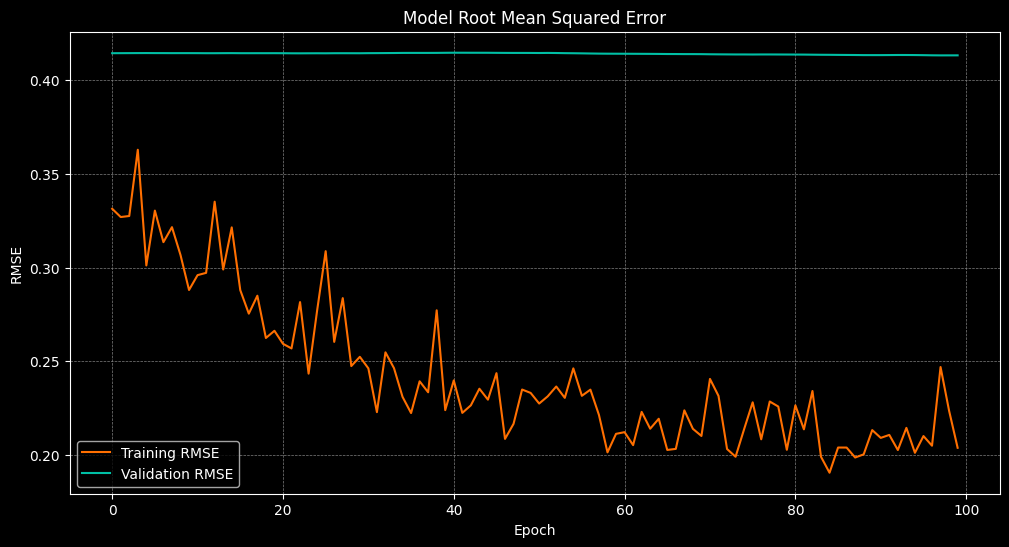

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style to dark mode
plt.style.use('dark_background')

# Visualize root mean squared error
plt.figure(figsize=(12, 6))
plt.plot(history.history['root_mean_squared_error'], label='Training RMSE', color='#FF6F00')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE', color='#00BFA5')
plt.title('Model Root Mean Squared Error', color='white')
plt.xlabel('Epoch', color='white')
plt.ylabel('RMSE', color='white')
plt.legend()
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.show()

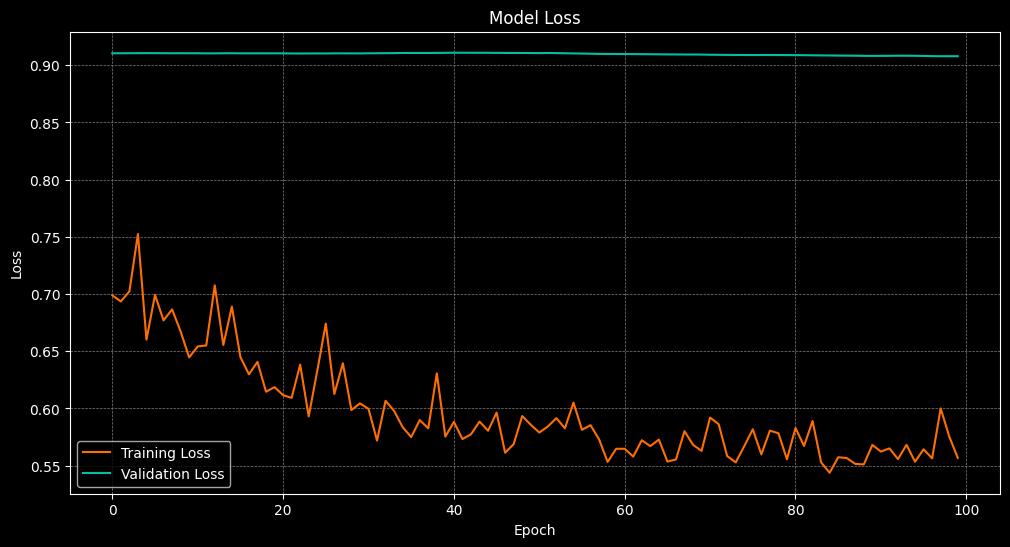

In [78]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='#FF6F00')
plt.plot(history.history['val_loss'], label='Validation Loss', color='#00BFA5')
plt.title('Model Loss', color='white')
plt.xlabel('Epoch', color='white')
plt.ylabel('Loss', color='white')
plt.legend()
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.show()

### 6.1. PIPLINE

In [79]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics.pairwise import cosine_similarity

class CosineSimilarityTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        self.cosine_sim = cosine_similarity(X, X)
        return self

    def transform(self, X):
        return self.cosine_sim

recommendation_pipeline = Pipeline([
    ('tfidf_vectorizer', TfidfVectorizer()),
    ('cosine_similarity', CosineSimilarityTransformer())
])

recommendation_pipeline.fit(places['type'])

place_id = 2
place_name = places.loc[places['id'] == place_id, 'name'].values[0]
similar_places = recommendation_pipeline.transform([place_name])

print(f"Top 10 recommendations for {place_name}:")
print(similar_places)


Top 10 recommendations for Museum Fatahillah:
[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]


In [80]:
import joblib

joblib.dump(recommendation_pipeline, 'recommendation_pipeline.pkl')
loaded_pipeline = joblib.load('recommendation_pipeline.pkl')



### 7.1. Tes Rekomendasi

Melakukan uji coba atau tes rekomendasi tempat yang diberikan. Namun perlu dikertahui terlebih dahulu untuk variabel khusus orang yang belum pernah mengunjungi tempat tersebut (belum memberikan rating) dengan place_not_rated.

In [81]:
place_df = places
ratings_df = ratings
print(ratings)

    User_id  id  rating  user  place
78      186  81    68.0    66     78
0       145   1    95.0     0      0
68       83  70    94.0    60     68
22      145  23    97.0     0     22
12        9  13   100.0    11     12
..      ...  ..     ...   ...    ...
20      162  21    80.0    19     20
60       82  62    53.0    54     60
71       97  74    57.0    23     71
14       86  15    86.0    13     14
51       27  53    55.0    46     51

[85 rows x 5 columns]


In [82]:
user_id = input("Please enter the user_id: ")

user_id = int(user_id)

if user_id in ratings_df['User_id'].values:
    Iuser_id = user_id
    place_rated = ratings_df[ratings_df.User_id == Iuser_id]

    place_not_rated = place_df[~place_df['id'].isin(
        place_rated.id.values)]['id']
    place_not_rated = list(
        set(place_not_rated).intersection(set(place_to_place_encoded.keys()))
    )

    place_not_rated = [
        [place_to_place_encoded.get(x)] for x in place_not_rated]
    user_encoder = user_to_user_encoded.get(Iuser_id)
    user_place_array = np.hstack(
        ([[user_encoder]] * len(place_not_rated), place_not_rated)
    )

Please enter the user_id: 1


In [83]:
  ratings = model.predict(user_place_array).flatten()

  top_ratings_indices = ratings.argsort()[-10:][::-1]
  recommended_place_ids = [
      place_encoded_to_place.get(place_not_rated[x][0]) for x in top_ratings_indices
  ]

  print('-----' * 8)
  print('Place with high ratings from user')
  print('-----' * 8)

  top_place_user = (
      place_rated.sort_values(
          by='rating',
          ascending=False
      )
      .head(5)
      .id.values
  )

  place_df_rows = place_df[place_df['id'].isin(top_place_user)]
  for row in place_df_rows.itertuples():
      print(row.name + ':', row.type)

  print('-----' * 8)
  print('Top 10 place recommendation')
  print('-----' * 8)

  recommended_place = place_df[place_df['id'].isin(recommended_place_ids)]
  for row in recommended_place.itertuples():
      print(row.name + ':', row.type)

else:
    random_recommendations = np.random.choice(place_df['id'], size=10, replace=False)

    print('-----' * 8)
    print("User_id not found or user_encoder is None. Displaying 10 random recommendations:")
    print('-----' * 8)
    for place_id in random_recommendations:
        recommended_place = place_df[place_df['id'] == place_id]
        print(recommended_place.iloc[0]['name'] + ':', recommended_place.iloc[0]['type'])


3/3 [==============================] - 0s 3ms/step
----------------------------------------
Place with high ratings from user
----------------------------------------
Danau Ubur-ubur: Lake
----------------------------------------
Top 10 place recommendation
----------------------------------------
Monumen Nasional: Museum
Museum Sudirman : Museum
Museum Angkut: Museum
Museum Mandar Majene: Museum
Museum Siwalima: Museum
Museum Jenderal Ahmad Yani: Museum
Kelingking Beach Nusa Penida: Beach
Pink Beach Lombok: Beach
Pantai Kemala: Beach
Pantai Dulanga: Beach
----------------------------------------
User_id not found or user_encoder is None. Displaying 10 random recommendations:
----------------------------------------
Danau Limboto: Lake
Rumah Adat Mamuju: Historical
Danau Biru Kolaka Utara: Lake
Air Terjun Limbong Kamandang: Waterfall
Tugu Jogja: Landmark
Museum Perjuangan Rakyat: Museum
Museum Sulawesi Tengah: Museum
Patung Yesus Penebus: Landmark
Pantai Maahas: Beach
Danau Ranu Agung:

###DOWLOAD MODEL

In [85]:
# Save only the weights
model.save_weights('rekomendasi_wisata_model_weights.h5')

# Save the model architecture to a JSON file
model_json = model.to_json()
with open('rekomendasi_wisata_model.json', 'w') as json_file:
    json_file.write(model_json)

# Save only the weights
model.save_weights('rekomendasi_wisata_model_weights.h5')
